In [1]:
import pandas as pd
import operator
import matplotlib.pyplot as plt
import matplotlib
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
contraceptive_data = pd.read_csv("contraceptive_method_dataset.csv", 
                                 encoding = "ISO-8859-1", engine='python')


In [3]:
contraceptive_data.head()

,wife_age,wife_education,husband_education,children,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [4]:
contraceptive_data.shape

(1473, 10)

# Statistical Method 
Using describe, statistical method such as count, mean, std, minimum, 25%, 50%, 75%, and maximum was used to describe the dataset

In [5]:
contraceptive_data.describe()

,wife_age,wife_education,husband_education,children,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method_used
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


_Notes_
- The survey was conducted with wife's age between 16 to 49. The mean and median of wife's age is around 32 years old. These women's education and husband's education background ranges from low (1) to high (4). Men are better educated than women. 
- The number of children could range from 0 to 16. 50% of the couple has at least 3 children which is pretty close to the computed average number of children. 
- In this survery, almost 85% of the women are Islam.  Around 75% of the women are not working. The husband's occupation is equally distributed along every quartile but it seems there are more 3 because the mean is 2.13 meaning there are more men who have better occupation (3). attained secondary education. 
- The average of standard of living index is 3.13 which means there are more living comfortably than those below 3. 
- The average person might only have 7% media exposure. 
- Between 1 to 3 of contraceptive use, it can't be measured effectivity because it is categorized as short term, long term, and no used. Probably other charts or data would provide better insights.

# DATA VISUALIZATION AND CLEANING
The wife's age and children are separated from the other columns to better visualize the plot. The wife's age and number of children have bigger ranges. Most attributes' ranges are hovering below 5


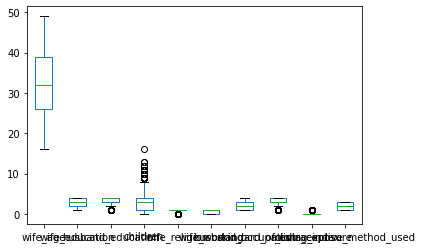

In [6]:
contraceptive_data.plot(kind = 'box')

In [7]:
#Created a function for remvoing the top outliers
x = contraceptive_data.children
u = 8.5
def removing_top_outliers(x):
    if x > u:
        return u
    else:
        return x
contraceptive_data.children = contraceptive_data.children.map(removing_top_outliers)

In [8]:
x = contraceptive_data.media_exposure
u = 0
contraceptive_data.media_exposure = contraceptive_data.media_exposure.map(removing_top_outliers)

In [9]:
#Created a function to remove the bottom outliers
x = contraceptive_data.standard_of_living_index
z = 1.75
    
def removing_bottom_outliers(x):
    if x < z:
        return z
    
    else:
        return x

contraceptive_data.standard_of_living_index = contraceptive_data.standard_of_living_index.map(removing_bottom_outliers)


In [10]:
x= contraceptive_data.husband_education
z= 1.5
contraceptive_data.husband_education = contraceptive_data.husband_education.map(removing_bottom_outliers)

In [11]:
x= contraceptive_data.wife_religion
z= 1.00
contraceptive_data.wife_religion = contraceptive_data.wife_religion.map(removing_bottom_outliers)

In [12]:
x=contraceptive_data.wife_working
z = 0.75
contraceptive_data.wife_working = contraceptive_data.wife_working.map(removing_bottom_outliers)

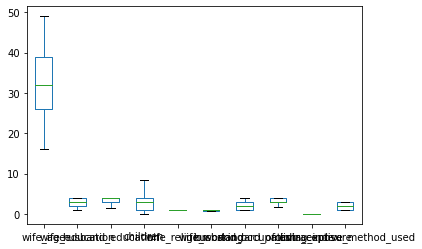

In [13]:
contraceptive_data.plot(kind = 'box')

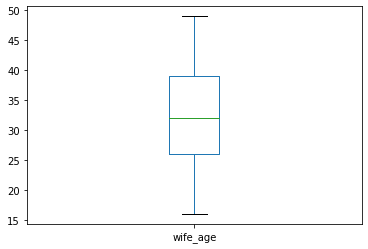

In [14]:
contraceptive_data.wife_age.plot(kind= 'box')

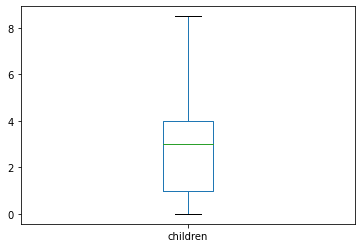

In [15]:
contraceptive_data.children.plot(kind= 'box')

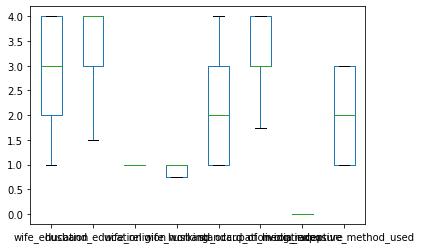

In [16]:
contraceptive_data2 = contraceptive_data.drop('wife_age', axis = 1)
contraceptive_data2 = contraceptive_data2.drop('children', axis = 1)
contraceptive_data2.plot(kind = 'box')

_Notes_
- The women's age is very symmetrical. The lower and upper fence is very balanced. There is no outlier to clean. 
- The number of children is slightly skewed to the right. It has a longer upper fence.
- The wife's education is the upper fence and 3rd Quartile are on the same line. The median is around 3. Having the 1st Quartile on 2 and lower fence on 1.
- The husband's education is on 4 which is the 3rd quartile and median while its 1st quartile is on 3 and lower fence which is on 1.5
- Most of the women are Islam.
- Majority of the women are not working. 
- The husband's occupation is an upper fence but has no lower fence. The first quartile, median and 3rd quartile are represented in this box plot.
- The upper fence and the 3rd quartile are on the same line in the standard of living index. There is no 1st quartile, but it has a lower fence.
- Majority of the people surveyed don't have many media exposure.
- The interpretation for the contraceptive method used is given the placeholder is between 1 to 3. This plot looks symmetrical without lower and upper fences.

# Analysis Of The Different Attributes Using Histograms


Saving figure attribute_histogram_plots


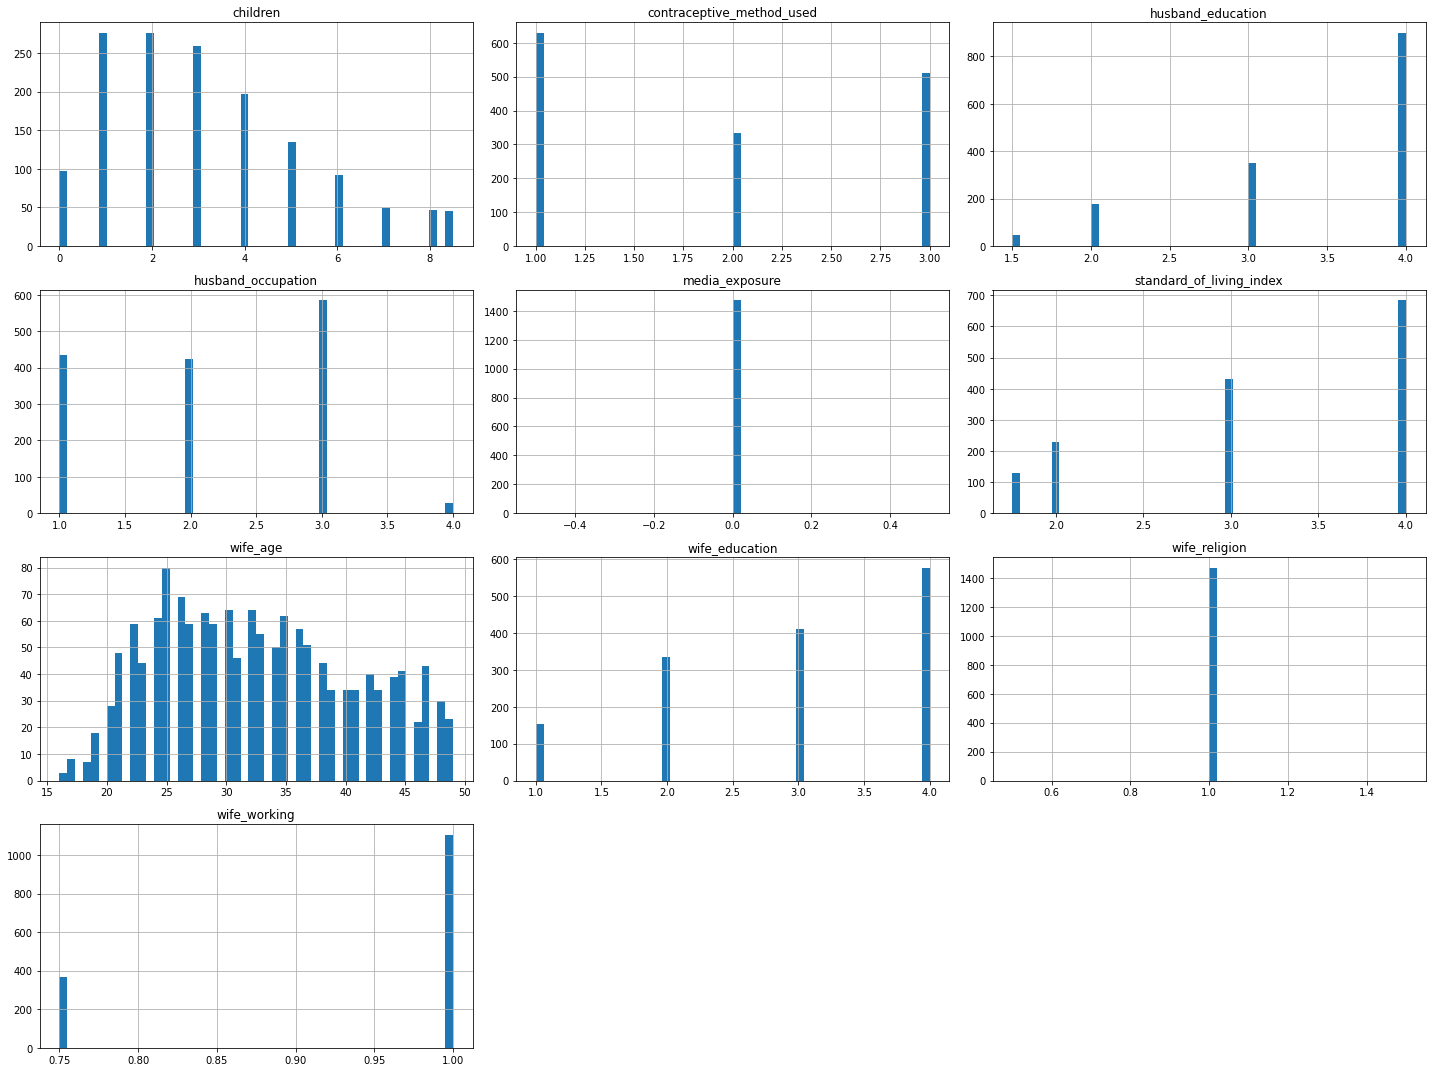

In [17]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    

contraceptive_data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

_Note_
- Based on the histogram, the wife's age and number of children are rightly skewed. The wife's age is continuous number while the number of children is discrete number.
- The attributes, husband's education, husband's occupation, standard of living index, and wife's education are ordinal numbers. They are represented in ascending order with 1 being the lowest and 4 being the highest. The standard of living index, husband's occupation, wife's and husband's education was rightly skewed. Both genders have attained high level of education but the more men have finished their secondary education education than women.
- The attributes, wife's religion, wife working, contraceptive methods and media exposure, are nominal scales. Wife's religion is either islam (1) or not (0). In this survey, the majority of the wife's religion is Islam.  The wife is either working (0) or not (1). In this survey, most wives are not working. The contraceptive method are placeholders for not using (0), long term use (1), and short term use (1). In this study, there are more people not using contraceptive methods. There are not more people using contraception in a short term period as opposed to using them long term. However, the survey didn't provide what is the time span between long and short term. The media exposure is either good (0) or not good (1). In this survey, the person doesn't have good amount of media exposure.
- The population predictor is generated from number of children in the family that are more than 2. There are more than 2 children in the family than less than 2 children.
